## RC11 Skills Session 06

# Self Organising Maps
### Maps to navigate vectorial territories
-----

In [1]:
import numpy as np

In [2]:
colours = np.random.random([400, 3])

In [4]:
colGrid = colours.reshape([20,20,3])

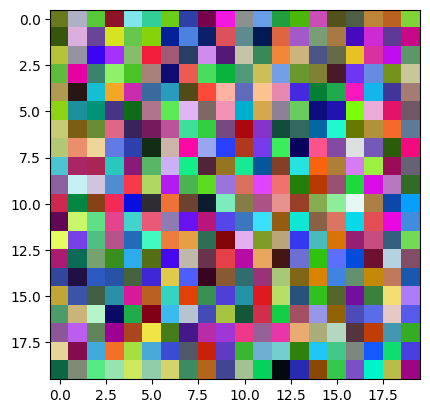

In [5]:
import matplotlib.pyplot as plt

fig = plt.figure()
plt.imshow(colGrid)
plt.show()

# 1. Nearest Neighbours recap

In [6]:
from sklearn.neighbors import NearestNeighbors

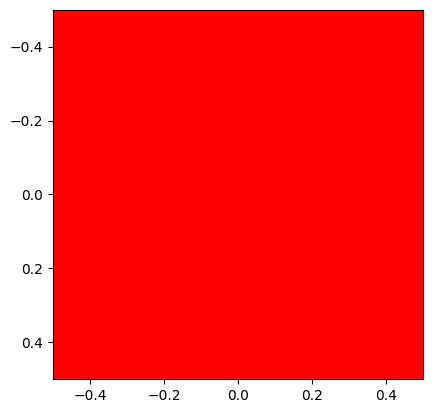

In [8]:
searchColour = [1., 0., 0.]

fig = plt.figure()
plt.imshow([[searchColour]])
plt.show()

In [14]:
nbrs = NearestNeighbors(n_neighbors = 10).fit(colours)

In [15]:
dists, indxs = nbrs.kneighbors([searchColour])

In [16]:
indxs

array([[311, 368,  45, 307, 130, 357, 194,  88, 184, 203]])

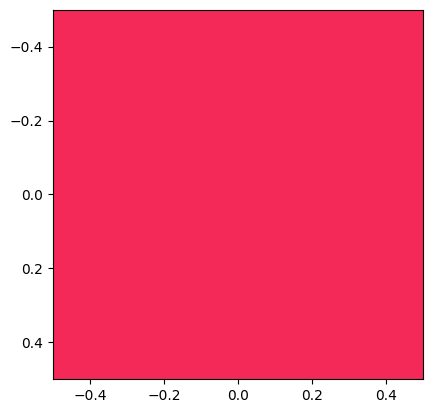

In [17]:
match = colours[indxs[0][9]]
fig = plt.figure()
plt.imshow([[match]])
plt.show()

# 2. Unsupervised learning

# 3. Clustering

## 3.1 K-Means

In [18]:
from sklearn.cluster import KMeans

In [19]:
kmeans = KMeans(n_clusters = 6, n_init='auto').fit(colours)

In [20]:
kmeans.labels_

array([5, 0, 5, 1, 2, 2, 5, 3, 1, 0, 0, 2, 5, 5, 0, 1, 5, 4, 1, 5, 5, 0,
       3, 4, 5, 5, 3, 2, 3, 4, 2, 3, 4, 0, 5, 4, 3, 0, 3, 1, 4, 0, 3, 0,
       5, 1, 1, 3, 0, 3, 4, 5, 4, 4, 3, 5, 4, 0, 0, 5, 5, 0, 5, 4, 5, 4,
       3, 4, 5, 5, 5, 4, 2, 5, 5, 1, 3, 2, 5, 4, 4, 1, 2, 4, 0, 3, 2, 1,
       4, 4, 3, 4, 0, 3, 5, 5, 0, 2, 3, 4, 5, 2, 5, 3, 5, 0, 5, 0, 1, 0,
       2, 4, 0, 5, 3, 3, 5, 0, 1, 1, 4, 1, 5, 0, 1, 1, 0, 2, 5, 3, 1, 3,
       5, 5, 3, 2, 5, 4, 4, 3, 4, 4, 4, 2, 3, 1, 0, 0, 0, 3, 1, 3, 5, 3,
       0, 3, 0, 3, 5, 0, 2, 1, 1, 2, 1, 5, 0, 2, 1, 1, 2, 3, 1, 2, 4, 4,
       0, 4, 1, 3, 0, 0, 0, 2, 1, 4, 0, 5, 5, 0, 4, 0, 4, 5, 1, 1, 5, 0,
       0, 5, 1, 5, 1, 1, 3, 1, 4, 1, 1, 2, 5, 0, 4, 1, 5, 2, 0, 4, 3, 2,
       1, 4, 2, 0, 2, 0, 0, 3, 1, 3, 3, 2, 1, 2, 1, 4, 2, 4, 0, 2, 4, 3,
       2, 0, 3, 2, 4, 4, 5, 1, 0, 5, 4, 3, 2, 4, 1, 0, 3, 5, 1, 5, 5, 5,
       2, 5, 3, 0, 1, 1, 0, 4, 1, 3, 5, 3, 3, 1, 0, 1, 3, 1, 3, 3, 5, 3,
       4, 3, 1, 1, 5, 1, 4, 1, 4, 2, 5, 4, 4, 3, 4,

In [31]:
indices0 = [i for i, x in enumerate(kmeans.labels_) if x == 5]
cluster0 = [colours[i] for i in indices0]

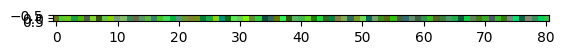

In [32]:
fig = plt.figure()
plt.imshow([cluster0])
plt.show()

<IPython.core.display.Javascript object>


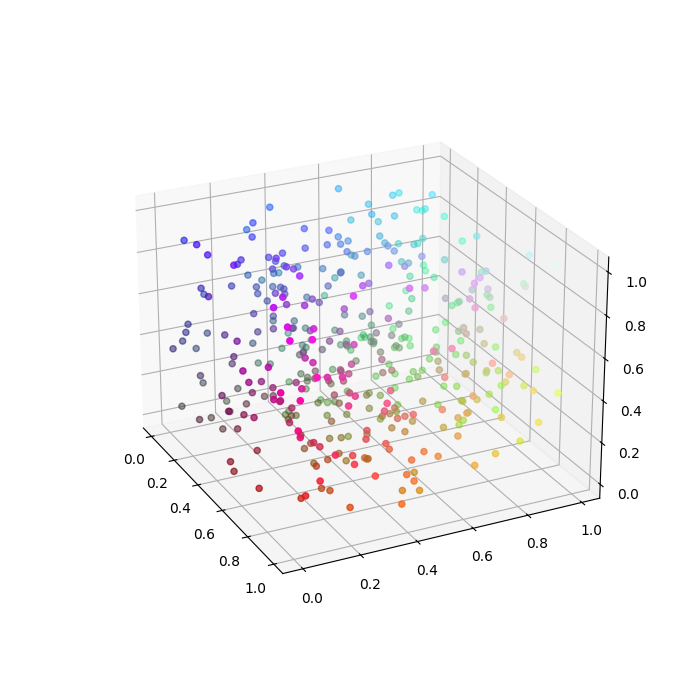

In [37]:
%matplotlib notebook
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(projection='3d')

cs = [[x[0], x[1], x[2]]for x in colours]
ax.scatter([c[0] for c in colours], [c[1] for c in colours], [c[2] for c in colours], color = cs )

plt.show()


In [38]:
centres = kmeans.cluster_centers_

<IPython.core.display.Javascript object>


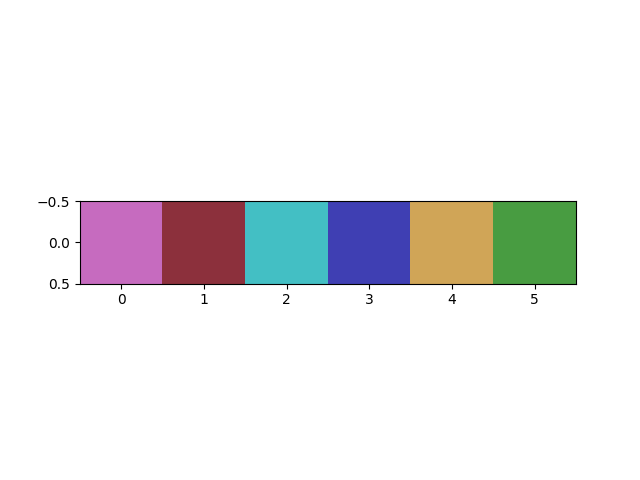

In [39]:
fig = plt.figure()
plt.imshow([centres])
plt.show()

<IPython.core.display.Javascript object>


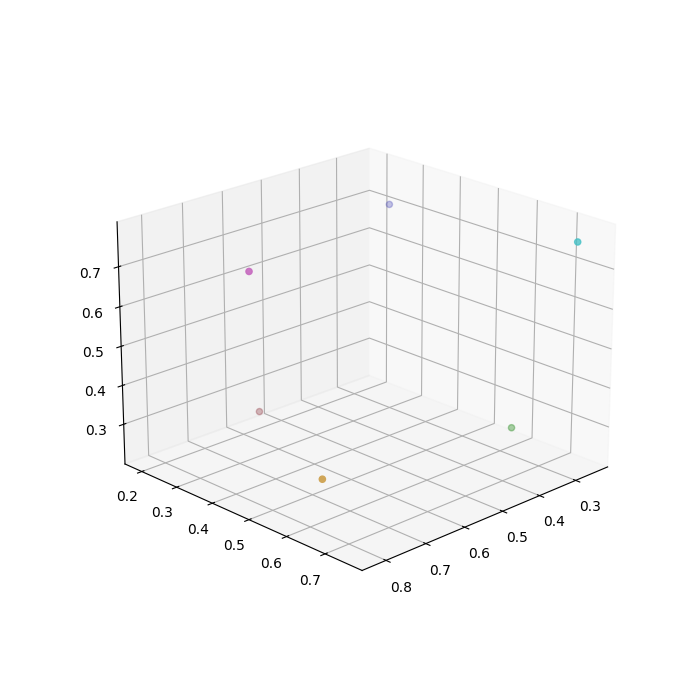

In [40]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(projection='3d')
cs = [[x[0], x[1], x[2]]for x in centres]
ax.scatter([c[0] for c in centres], [c[1] for c in centres], [c[2] for c in centres], color = cs)

#plt.axis('off')
plt.show()

<IPython.core.display.Javascript object>


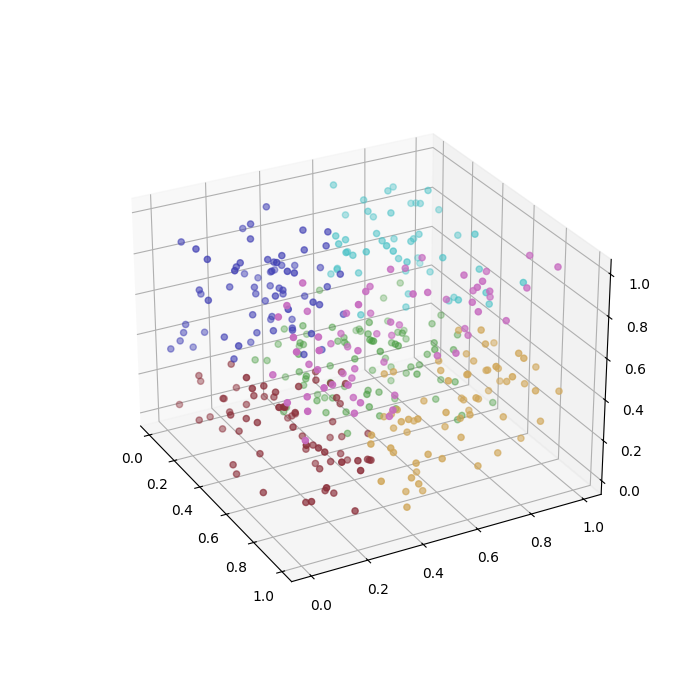

In [41]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(projection='3d')

cs = [centres[kmeans.predict([x])] for x in colours]
ax.scatter([c[0] for c in colours], [c[1] for c in colours], [c[2] for c in colours], color = cs )

plt.show()

__Now with colours from a picture__

In [42]:
from PIL import Image

In [44]:
rhodin = Image.open('RhodinAssembly.png')

In [45]:
rhodin = np.array(rhodin, dtype=np.float64)/255

In [46]:
rhodin

array([[[0.31372549, 0.30980392, 0.28627451, 1.        ],
        [0.31372549, 0.30980392, 0.28627451, 1.        ],
        [0.31764706, 0.31372549, 0.29019608, 1.        ],
        ...,
        [0.46666667, 0.44705882, 0.41176471, 1.        ],
        [0.46666667, 0.44705882, 0.41176471, 1.        ],
        [0.46666667, 0.44705882, 0.41176471, 1.        ]],

       [[0.30980392, 0.30588235, 0.28235294, 1.        ],
        [0.30980392, 0.30588235, 0.28235294, 1.        ],
        [0.30980392, 0.30588235, 0.28235294, 1.        ],
        ...,
        [0.45882353, 0.44313725, 0.40784314, 1.        ],
        [0.45882353, 0.44313725, 0.40784314, 1.        ],
        [0.45882353, 0.44313725, 0.40784314, 1.        ]],

       [[0.30588235, 0.30196078, 0.2745098 , 1.        ],
        [0.30980392, 0.30588235, 0.28235294, 1.        ],
        [0.31372549, 0.30980392, 0.28627451, 1.        ],
        ...,
        [0.45882353, 0.44313725, 0.40784314, 1.        ],
        [0.45882353, 0.443137

In [47]:
w,h,d = tuple(rhodin.shape)

<IPython.core.display.Javascript object>


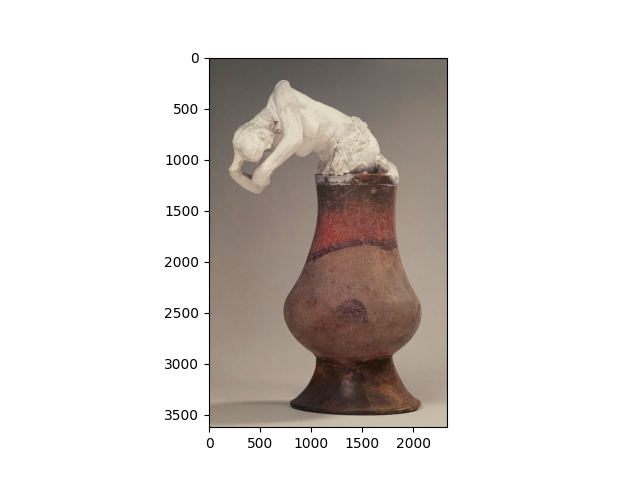

In [48]:
fig = plt.figure()
plt.imshow(rhodin)
plt.show()

In [49]:
image_array = np.reshape(rhodin, (w*h, d))

In [50]:
image_array

array([[0.31372549, 0.30980392, 0.28627451, 1.        ],
       [0.31372549, 0.30980392, 0.28627451, 1.        ],
       [0.31764706, 0.31372549, 0.29019608, 1.        ],
       ...,
       [0.78431373, 0.74117647, 0.66666667, 1.        ],
       [0.78431373, 0.74117647, 0.66666667, 1.        ],
       [0.78431373, 0.74117647, 0.66666667, 1.        ]])

In [51]:
image_array = image_array[:,:-1]

In [52]:
image_array

array([[0.31372549, 0.30980392, 0.28627451],
       [0.31372549, 0.30980392, 0.28627451],
       [0.31764706, 0.31372549, 0.29019608],
       ...,
       [0.78431373, 0.74117647, 0.66666667],
       [0.78431373, 0.74117647, 0.66666667],
       [0.78431373, 0.74117647, 0.66666667]])

In [54]:
len(image_array)

8444172

In [53]:
kmeans = KMeans(n_clusters = 6, n_init='auto').fit(image_array)

In [55]:
import random

image_subset = random.sample(list(image_array), 500)

<IPython.core.display.Javascript object>


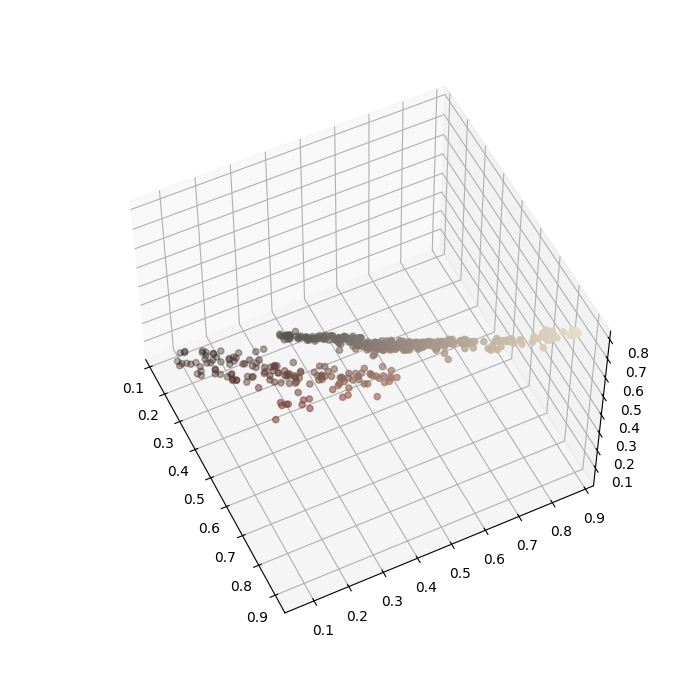

In [56]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(projection='3d')

cs = [[x[0], x[1], x[2]]for x in image_subset]
ax.scatter([c[0] for c in image_subset], [c[1] for c in image_subset], [c[2] for c in image_subset], color = cs)

#plt.axis('off')
plt.show()

<IPython.core.display.Javascript object>


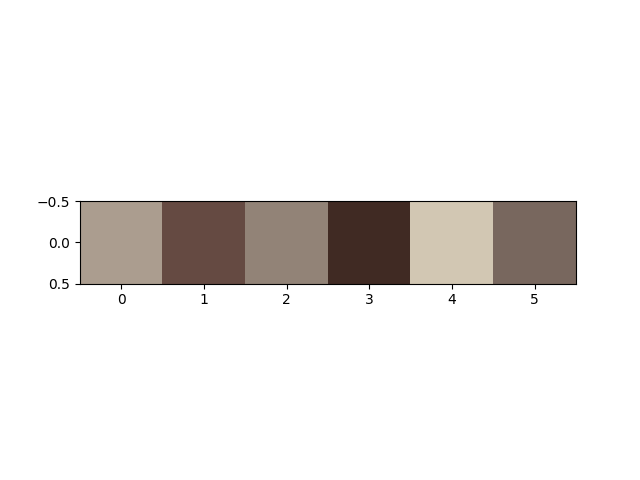

In [57]:
centres = kmeans.cluster_centers_

fig = plt.figure()
plt.imshow([centres])
plt.show()

<IPython.core.display.Javascript object>


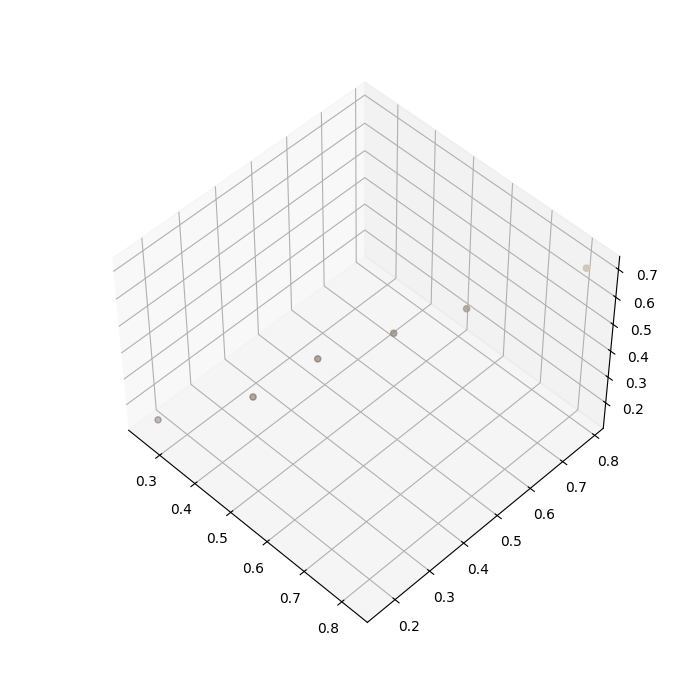

In [58]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(projection='3d')
cs = [[x[0], x[1], x[2]]for x in centres]
ax.scatter([c[0] for c in centres], [c[1] for c in centres], [c[2] for c in centres], color = cs)

#plt.axis('off')
plt.show()

<IPython.core.display.Javascript object>


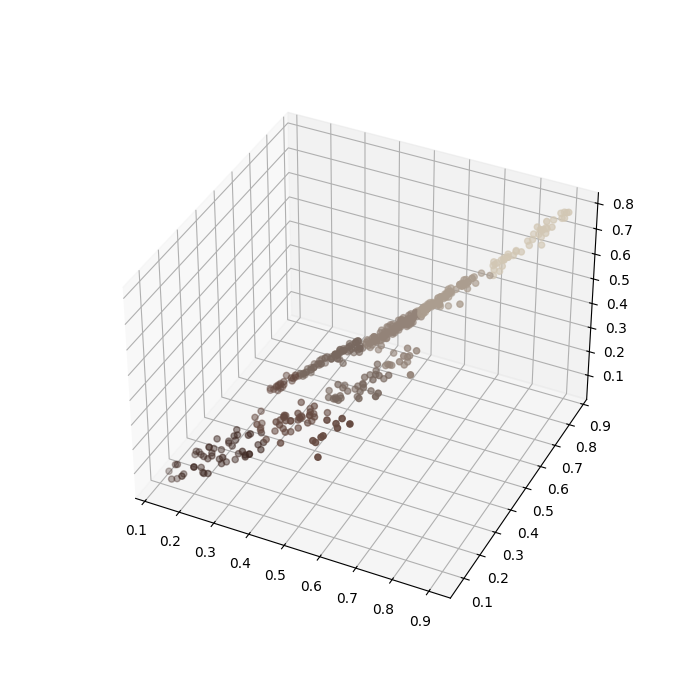

In [59]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(projection='3d')

cs = [centres[kmeans.predict([x])] for x in image_subset]
ax.scatter([c[0] for c in image_subset], [c[1] for c in image_subset], [c[2] for c in image_subset], color = cs)

#plt.axis('off')
plt.show()

__repaint the picture with 6 colours__

In [60]:
labels = kmeans.predict(image_array)

<IPython.core.display.Javascript object>


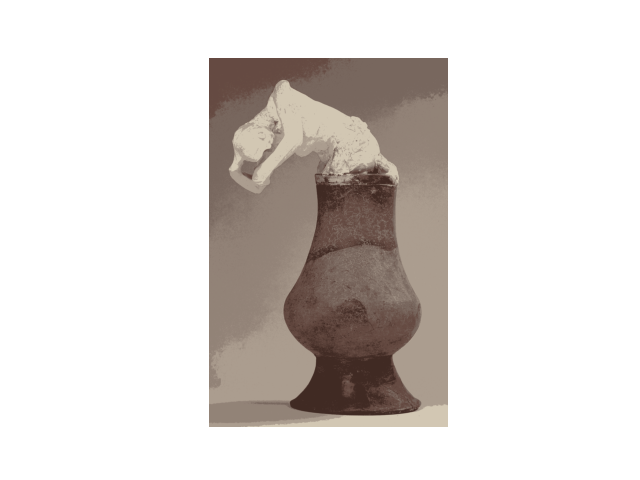

In [61]:
plt.figure()
plt.axis("off")
plt.imshow(kmeans.cluster_centers_[labels].reshape(w,h,-1))

# 4. PCA

In [62]:
from sklearn.decomposition import PCA

In [63]:
pca = PCA(n_components = 2)
colourComponents = pca.fit_transform(image_array)

In [64]:
pca.components_

array([[-0.55455367, -0.61183245, -0.56403128],
       [ 0.81983257, -0.28551918, -0.49633995]])

In [65]:
pca.mean_

array([0.54693282, 0.47866135, 0.43383149])

<IPython.core.display.Javascript object>


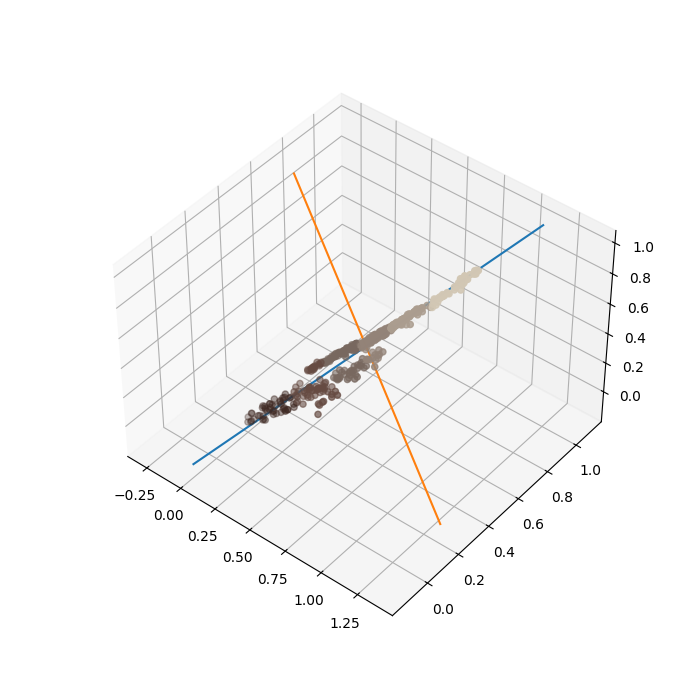

In [66]:
pcaV1s = pca.mean_-pca.components_[0]
pcaV1e = pca.mean_ + pca.components_[0]

pcaV2s = pca.mean_-pca.components_[1]
pcaV2e = pca.mean_+pca.components_[1]

fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(projection='3d')

cs = [centres[kmeans.predict([x])] for x in image_subset]
ax.scatter([c[0] for c in image_subset], [c[1] for c in image_subset], [c[2] for c in image_subset], color = cs)

ax.plot([pcaV1s[0], pcaV1e[0]], [pcaV1s[1],pcaV1e[1]],zs=[pcaV1s[2],pcaV1e[2]])
ax.plot([pcaV2s[0], pcaV2e[0]], [pcaV2s[1],pcaV2e[1]],zs=[pcaV2s[2],pcaV2e[2]])

plt.show()

<IPython.core.display.Javascript object>


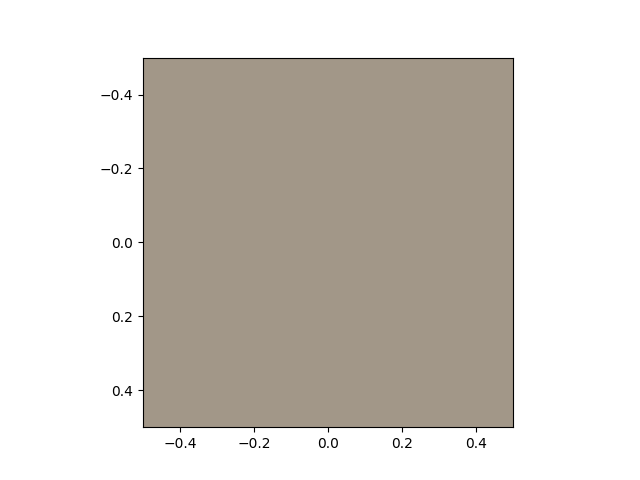

In [67]:
fig = plt.figure()
plt.imshow([[image_subset[0]]])
plt.show()

In [68]:
image_subset[0]

array([0.63529412, 0.59215686, 0.53333333])

In [70]:
pcaTranslated = pca.transform([image_subset[0]])
pcaTranslated

array([[-0.17456347, -0.00935041]])

In [71]:
pcaTranslatedBack = pca.inverse_transform(pcaTranslated)[0]

<IPython.core.display.Javascript object>


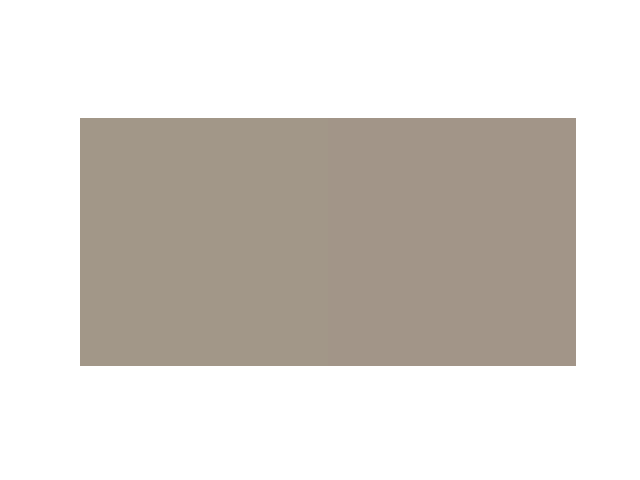

In [72]:
fig = plt.figure()
plt.imshow([[image_subset[0],pcaTranslatedBack]])
plt.axis('off')
plt.show()

In [73]:
image_subset[0], pcaTranslatedBack

(array([0.63529412, 0.59215686, 0.53333333]),
 array([0.63607186, 0.58813467, 0.53693173]))

__show the colours on their new scale__

<IPython.core.display.Javascript object>


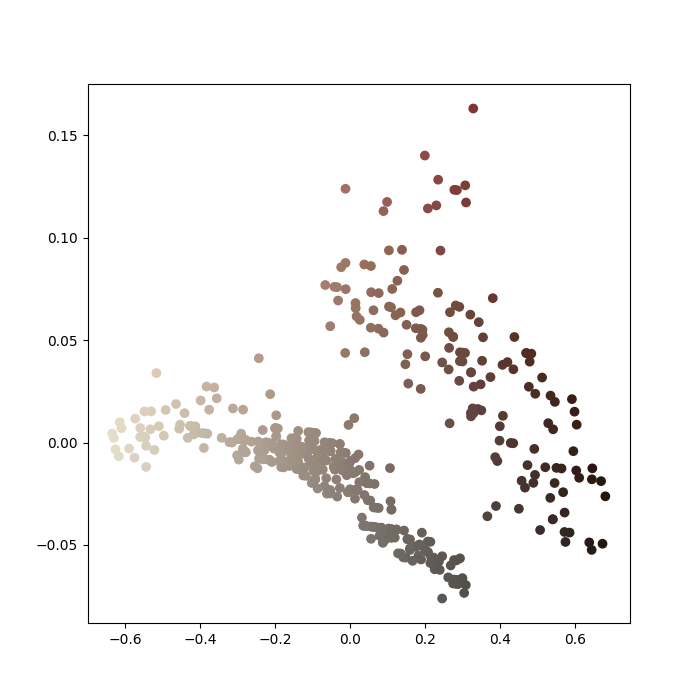

In [74]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot()
cs = [[x[0], x[1], x[2]]for x in image_subset]
ax.scatter([pca.transform([c])[0][0] for c in image_subset], [pca.transform([c])[0][1] for c in image_subset], color = cs)

plt.show()

# 5. SOM

## 5.1  Examples

Example: https://miro.romanvlahovic.com/2019/10/14/voids-brands-characters-and-how-to-deal-with-lots/

## 5.2  Basic version

Introduced by Teuvo Kohonen in 1982

Unsupervised learning method, specifically Competitive Learning.

A training set X. And a map SOM. The SOM consists of a grid with weights.

Algorithm:

- Initialise SOM with random grid weights
- Repeat following until convergance or maximum epochs
    - Shuffle training examples
    - For each training instance x
        - Find BMU in SOM
        - Update neighbourhood of BMU to draw closer to weights of x.
        
source: https://stackabuse.com/self-organizing-maps-theory-and-implementation-in-python-with-numpy/

<IPython.core.display.Javascript object>


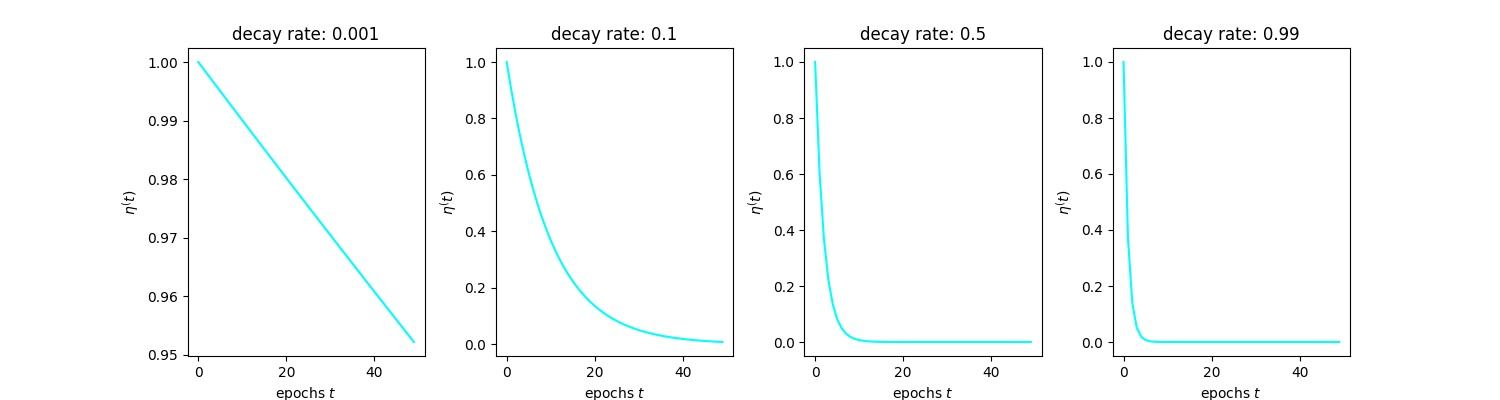

In [75]:
epochs = np.arange(0, 50)
lr_decay = [0.001, 0.1, 0.5, 0.99]
fig,ax = plt.subplots(nrows=1, ncols=4, figsize=(15,4))
plt_ind = np.arange(4) + 141
for decay, ind in zip(lr_decay, plt_ind):
    plt.subplot(ind)
    learn_rate = np.exp(-epochs * decay)
    plt.plot(epochs, learn_rate, c='cyan')
    plt.title('decay rate: ' + str(decay))
    plt.xlabel('epochs $t$')
    plt.ylabel('$\eta^(t)$')
fig.subplots_adjust(hspace=0.5, wspace=0.3)
plt.show()

<IPython.core.display.Javascript object>


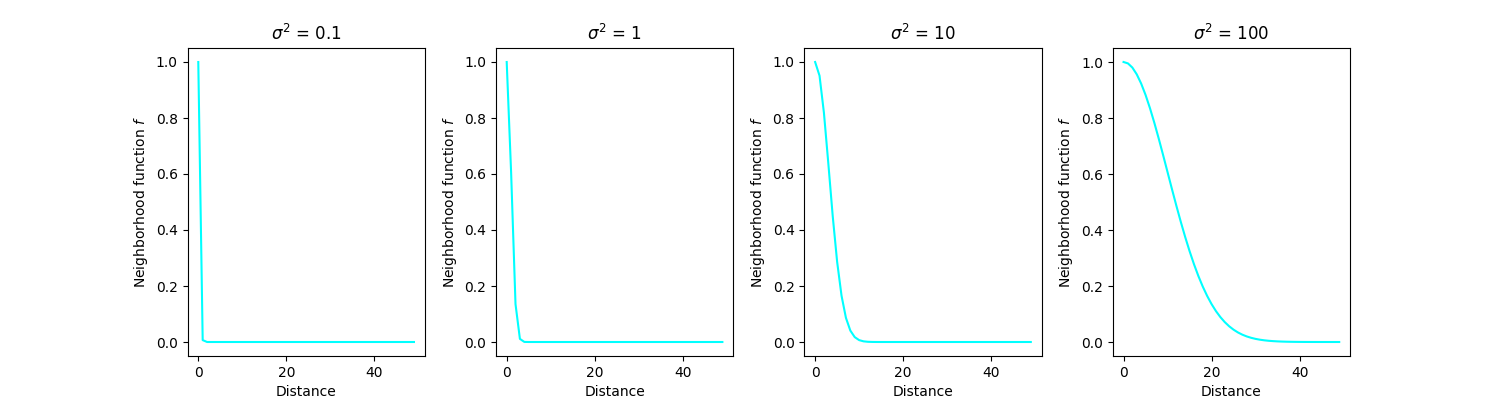

In [76]:
distance = np.arange(0, 50)
sigma_sq = [0.1, 1, 10, 100]
fig,ax = plt.subplots(nrows=1, ncols=4, figsize=(15,4))
plt_ind = np.arange(4) + 141
for s, ind in zip(sigma_sq, plt_ind):
    plt.subplot(ind)
    f = np.exp(-distance ** 2 / 2 / s)
    plt.plot(distance, f, c='cyan')
    plt.title('$\sigma^2$ = ' + str(s))
    plt.xlabel('Distance')
    plt.ylabel('Neighborhood function $f$')
fig.subplots_adjust(hspace=0.5, wspace=0.3)
plt.show()

In [77]:
def normalise(train, p):
    min_d = np.min(train)
    max_d = np.max(train)
    normalised_p = (p-min_d)/(max_d - min_d)
    return normalised_p

In [78]:
def denormalise(train, p):
    min_d = np.min(train)
    max_d = np.max(train)
    denormalised_p = p * (max_d - min_d) + min_d
    return denormalised_p

In [79]:
# Return the (g,h) index of the BMU in the grid
def find_BMU(SOM,x):
    distSq = (np.square(SOM - x)).sum(axis=2)
    return np.unravel_index(np.argmin(distSq, axis=None), distSq.shape)

# Update the weights of the SOM cells when given a single training example
# and the model parameters along with BMU coordinates as a tuple
def update_weights(SOM, train_ex, learn_rate, radius_sq, 
                   BMU_coord, step=3):
    g, h = BMU_coord
    #if radius is close to zero then only BMU is changed
    if radius_sq < 1e-3:
        SOM[g,h,:] += learn_rate * (train_ex - SOM[g,h,:])
        return SOM
    # Change all cells in a small neighborhood of BMU
    for i in range(max(0, g-step), min(SOM.shape[0], g+step)):
        for j in range(max(0, h-step), min(SOM.shape[1], h+step)):
            dist_sq = np.square(i - g) + np.square(j - h)
            dist_func = np.exp(-dist_sq / 2 / radius_sq)
            SOM[i,j,:] += learn_rate * dist_func * (train_ex - SOM[i,j,:])   
    return SOM    

# Main routine for training an SOM. It requires an initialized SOM grid
# or a partially trained grid as parameter
def train_SOM(SOM, train_data, learn_rate = .1, radius_sq = 1, 
             lr_decay = .1, radius_decay = .1, epochs = 10):    
    learn_rate_0 = learn_rate
    radius_0 = radius_sq
    for epoch in np.arange(0, epochs):
        rand.shuffle(train_data)      
        for train_ex in train_data:
            g, h = find_BMU(SOM, train_ex)
            SOM = update_weights(SOM, train_ex, 
                                 learn_rate, radius_sq, (g,h))
        # Update learning rate and radius
        learn_rate = learn_rate_0 * np.exp(-epoch * lr_decay)
        radius_sq = radius_0 * np.exp(-epoch * radius_decay)            
    return SOM

In [80]:
# Dimension of the SOM grid
m = 10 
n = 10

# Number of training examples

n_x = 3000
rand = np.random.RandomState(0)

#Initiatlise training data
train_data = rand.randint(0, 255, (n_x, 3))

# Normalised training data
n_train_data = normalise(train_data, train_data)

In [92]:
# Initialize the SOM randomly
SOM = rand.uniform(0,1,(m,n,3))

# to show the original vector space:
oSOM = denormalise(train_data, SOM)

<IPython.core.display.Javascript object>


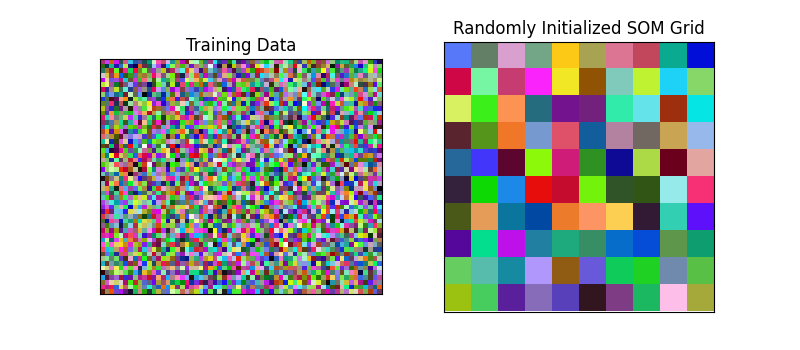

In [94]:
# Display both the training matrix and the SOM grid
fig, ax = plt.subplots(
    nrows=1, ncols=2, figsize=(8, 3.5), 
    subplot_kw=dict(xticks=[], yticks=[]))
ax[0].imshow(train_data.reshape(50, 60, 3))
ax[0].title.set_text('Training Data')
ax[1].imshow(oSOM.astype(int))
ax[1].title.set_text('Randomly Initialized SOM Grid')

<IPython.core.display.Javascript object>


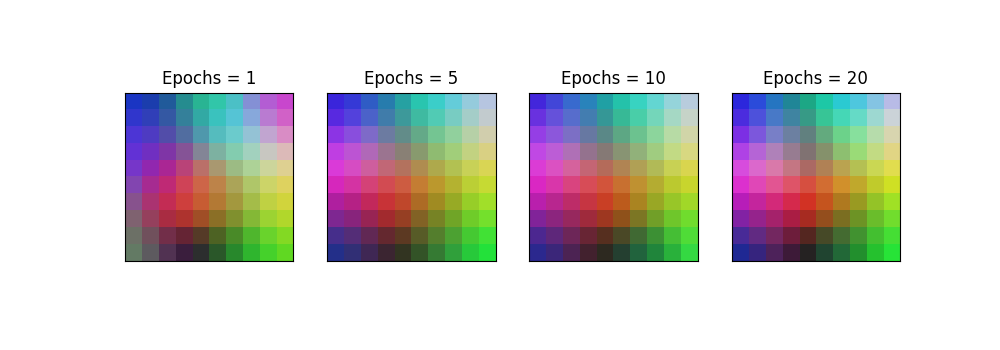

In [85]:
fig, ax = plt.subplots(
    nrows=1, ncols=4, figsize=(10, 3.5), 
    subplot_kw=dict(xticks=[], yticks=[]))

total_epochs = 0

for epochs, i in zip([1, 4, 5, 10], range(0,4)):
    total_epochs += epochs
    SOM = train_SOM(SOM, n_train_data, epochs=epochs)
    
    oSOM = denormalise(train_data, SOM)    
    ax[i].imshow(oSOM.astype(int))
    ax[i].title.set_text('Epochs = ' + str(total_epochs))

<IPython.core.display.Javascript object>


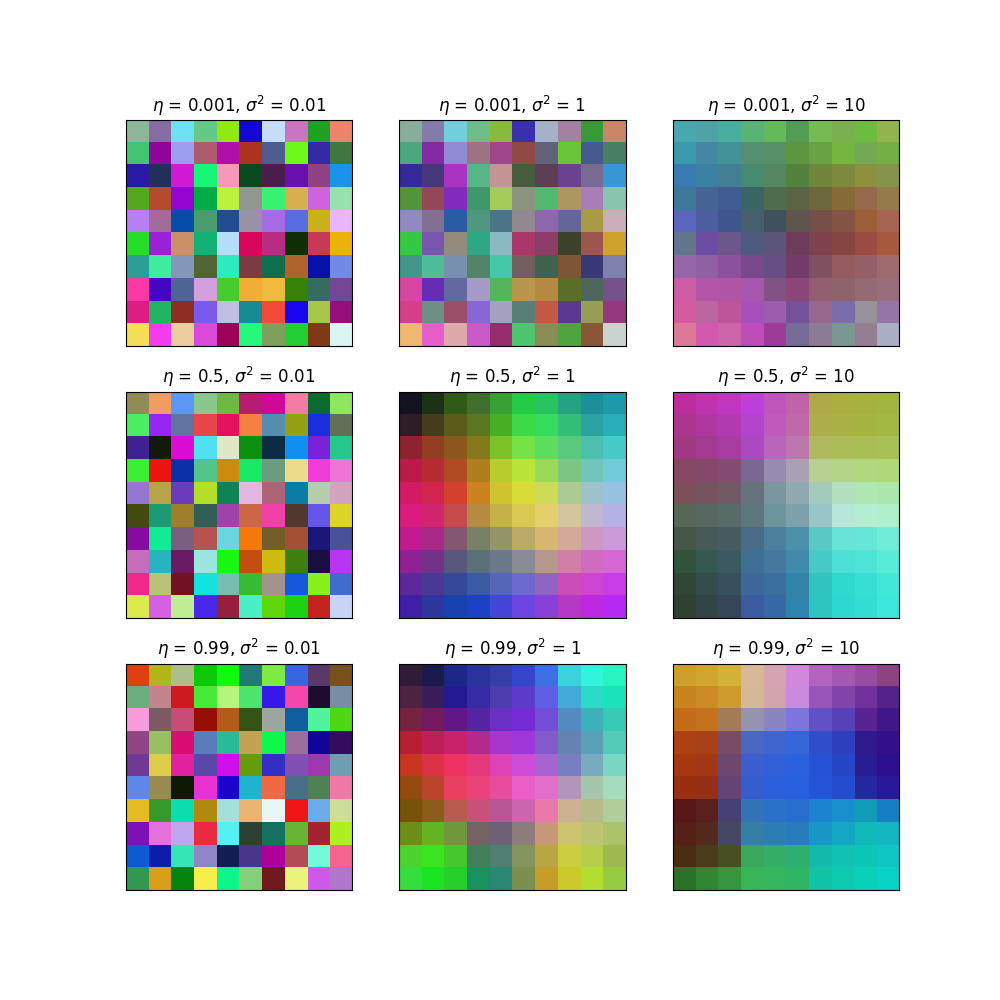

In [95]:
fig, ax = plt.subplots(
    nrows=3, ncols=3, figsize=(10, 10), 
    subplot_kw=dict(xticks=[], yticks=[]))

# Initialize the SOM randomly to the same state

for learn_rate, i in zip([0.001, 0.5, 0.99], [0, 1, 2]):
    for radius_sq, j in zip([0.01, 1, 10], [0, 1, 2]):
        rand = np.random.RandomState(0)
        SOM = rand.uniform(0, 1, (m, n, 3))        
        SOM = train_SOM(SOM, n_train_data, epochs = 5,
                        learn_rate = learn_rate, 
                        radius_sq = radius_sq)
        oSOM = denormalise(train_data, SOM)
        ax[i][j].imshow(oSOM.astype(int))
        ax[i][j].title.set_text('$\eta$ = ' + str(learn_rate) + 
                                ', $\sigma^2$ = ' + str(radius_sq))

In [96]:
import scipy
def calculateQE(SOM,data):
    sumSqDist = 0
    for d in data:
        g,h = find_BMU(SOM, d)
        v1 = SOM[g,h]
        v2 = d
        sumSqDist += scipy.spatial.distance.cdist([v1],[v2],'sqeuclidean')[0][0]
    QE = sumSqDist/len(data)
    return QE

In [97]:
# Return the (g,h) index of the BMU in the grid
def find_BMU_2(SOM,x):
    distSq = (np.square(SOM - x)).sum(axis=2)
    return np.unravel_index(np.argpartition(distSq, 2, axis=None)[2], distSq.shape)

In [98]:
def calculateTE(SOM,data):
    failed = 0
    for d in data:
        g1,h1 = find_BMU(SOM,d)
        g2,h2 = find_BMU_2(SOM,d)
        dist = scipy.spatial.distance.cityblock([g1,h1], [g2,h2])
        if dist>1:
            failed+=1
    return failed/len(data)

<IPython.core.display.Javascript object>


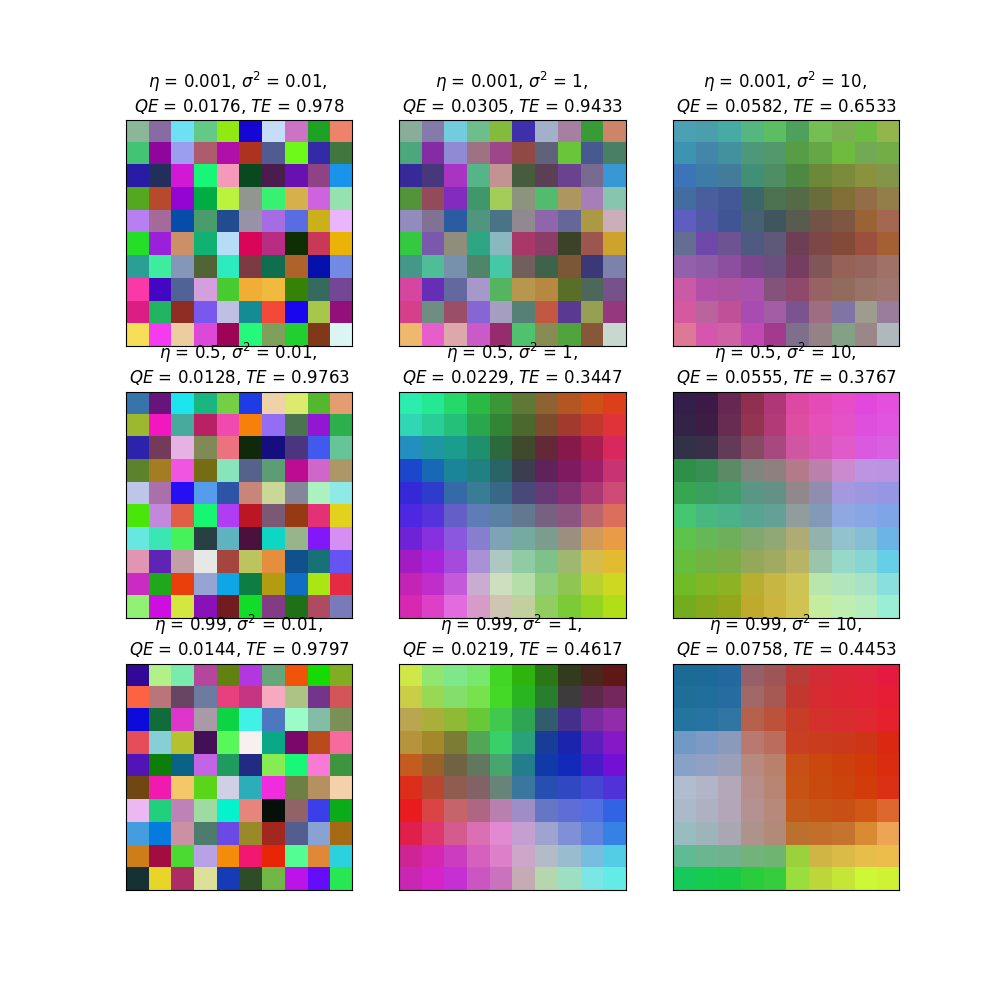

In [99]:
fig, ax = plt.subplots(
    nrows=3, ncols=3, figsize=(10, 10), 
    subplot_kw=dict(xticks=[], yticks=[]))

# Initialize the SOM randomly to the same state

SOMS = []

for learn_rate, i in zip([0.001, 0.5, 0.99], [0, 1, 2]):
    for radius_sq, j in zip([0.01, 1, 10], [0, 1, 2]):
        rand = np.random.RandomState(0)
        SOM = rand.uniform(0, 1, (m, n, 3))        
        SOM = train_SOM(SOM, n_train_data, epochs = 5,
                        learn_rate = learn_rate, 
                        radius_sq = radius_sq)
        QE = round(calculateQE(SOM, n_train_data), 4)
        TE = round(calculateTE(SOM, n_train_data), 4)
        SOMS.append(SOM)
        oSOM = denormalise(train_data, SOM)
        ax[i][j].imshow(oSOM.astype(int))
        ax[i][j].title.set_text('$\eta$ = ' + str(learn_rate) + 
                                ', $\sigma^2$ = ' + str(radius_sq) + 
                               ', \n$QE$ = ' + str(QE) + 
                               ', $TE$ = ' + str(TE))

In [100]:
import sklearn

def euclidean(a, b):
    return np.linalg.norm(a-b)

def u_matrix(lattice):
    """Builds a U-matrix on top of the trained lattice.

        Parameters
        ---
        lattice : list

            The SOM generated lattice

        Returns
        ---
        The lattice of the shape (R,C):

        R - number of rows; C - number of columns;
        """
    X, Y, Z = lattice.shape
    u_values = np.empty((X,Y), dtype=np.float64)

    for y in range(Y):
        for x in range(X):
            current = lattice[x,y]
            dist = 0
            num_neigh = 0
            # left
            if x-1 >= 0:
                #middle
                vec = lattice[x-1,y]
                dist += euclidean(current, vec)
                num_neigh += 1
                if y - 1 >= 0:
                    #sup
                    vec = lattice[x-1, y-1]
                    dist += euclidean(current, vec)
                    num_neigh += 1
                if y + 1 < Y:
                    # down
                    vec = lattice[x-1,y+1]
                    dist += euclidean(current, vec)
                    num_neigh += 1
            # middle
            if y - 1 >= 0:
                # up
                vec = lattice[x,y-1]
                dist += euclidean(current, vec)
                num_neigh += 1
            # down
            if y + 1 < Y:
                vec = lattice[x,y+1]
                dist += euclidean(current, vec)
                num_neigh += 1
            # right
            if x + 1 < X:
                # middle
                vec = lattice[x+1,y]
                dist += euclidean(current, vec)
                num_neigh += 1
                if y - 1 >= 0:
                    #up
                    vec = lattice[x+1,y-1]
                    dist += euclidean(current, vec)
                    num_neigh += 1
                if y + 1 < lattice.shape[1]:
                    # down
                    vec = lattice[x+1,y+1]
                    dist += euclidean(current, vec)
                    num_neigh += 1
            u_values[x,y] = dist / num_neigh
    u_values = (u_values - 1) * -1
    return u_values

In [101]:
u_matrix(SOM)

array([[0.98037979, 0.97320103, 0.775143  , 0.74943009, 0.8673728 ,
        0.86561556, 0.9342193 , 0.96605465, 0.96535231, 0.94980623],
       [0.9704369 , 0.96347709, 0.76469664, 0.72550483, 0.86269058,
        0.88236284, 0.9397147 , 0.9641002 , 0.96218483, 0.95805025],
       [0.82708879, 0.82964535, 0.67160446, 0.70273352, 0.84451809,
        0.88261833, 0.93539374, 0.93925648, 0.93031501, 0.9209719 ],
       [0.80379342, 0.81059524, 0.72637585, 0.75687811, 0.80927276,
        0.86067007, 0.93828693, 0.92735625, 0.91571344, 0.91603255],
       [0.88643102, 0.89627338, 0.83407666, 0.8392893 , 0.80037752,
        0.82625195, 0.95269939, 0.95515649, 0.9445124 , 0.95193984],
       [0.89402855, 0.90710382, 0.87174002, 0.87410371, 0.79784443,
        0.81880004, 0.96017632, 0.95338839, 0.91787284, 0.88960347],
       [0.94394086, 0.93662222, 0.89356153, 0.88714552, 0.80919211,
        0.79697196, 0.91969624, 0.89358152, 0.8338672 , 0.79563312],
       [0.84525551, 0.85430318, 0.8302885

<IPython.core.display.Javascript object>


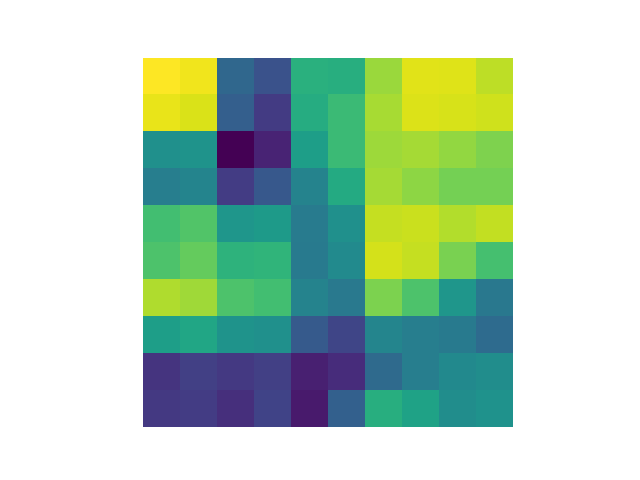

In [102]:
import matplotlib.pyplot as plt

fig = plt.figure()
plt.imshow(u_matrix(SOM))
plt.axis('off')
plt.show()

<IPython.core.display.Javascript object>


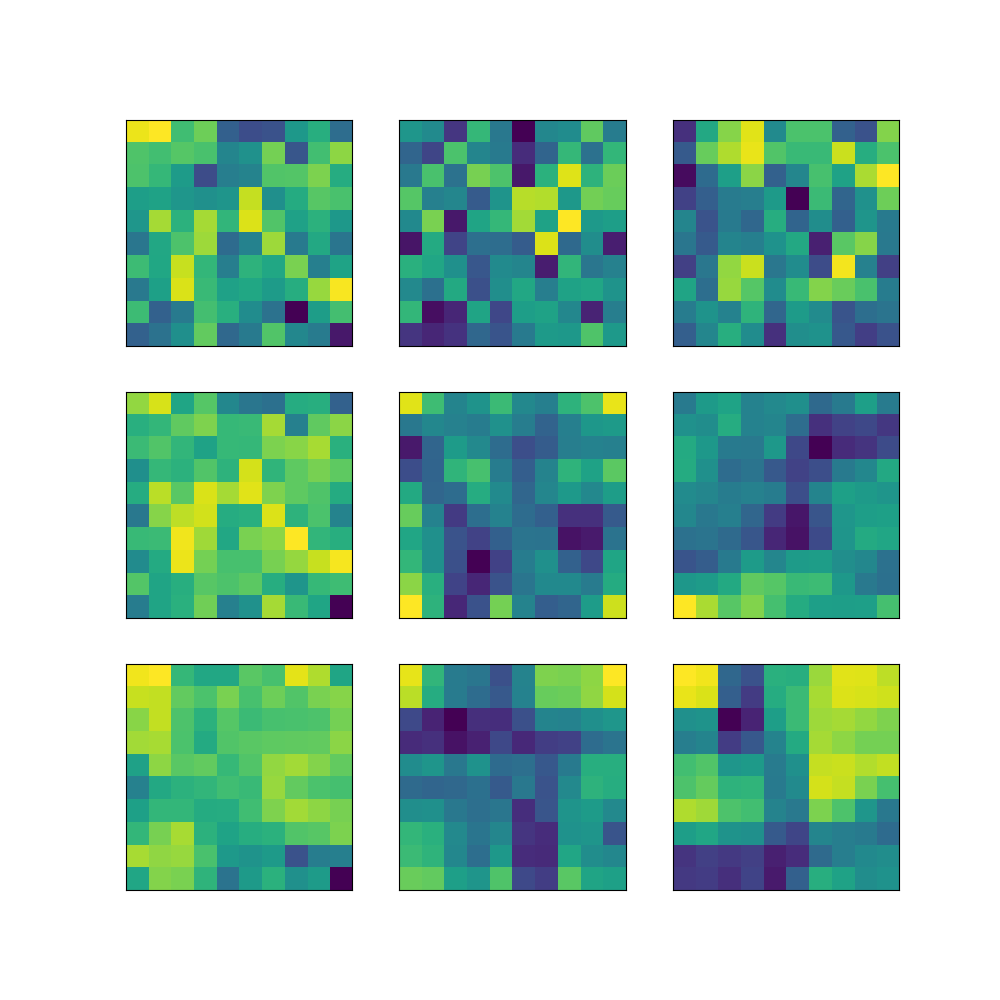

In [104]:
fig, ax = plt.subplots(
    nrows=3, ncols=3, figsize=(10, 10), 
    subplot_kw=dict(xticks=[], yticks=[]))

# Initialize the SOM randomly to the same state

for s, n in zip(SOMS, range(len(SOMS))):
        QE = round(calculateQE(s, n_train_data), 4)
        TE = round(calculateTE(s, n_train_data), 4)
        
        i = n%3
        j = n//3
        
        ax[i][j].imshow(u_matrix(s))